In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# species = target

In [3]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.shape

(150, 5)

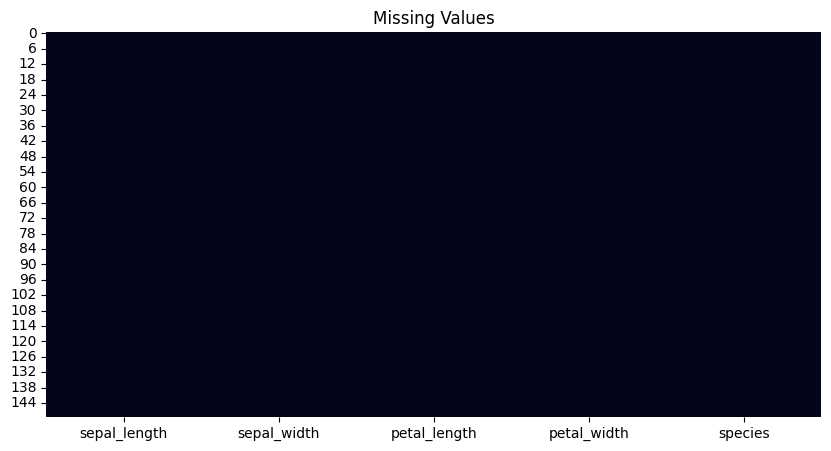

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris_cpy = iris.copy()

plt.figure(figsize=(10, 5))

plt.title("Missing Values")
sns.heatmap(iris_cpy.isnull(), cbar=False)
plt.show()

iris_cpy.isnull().sum()

In [7]:
target = 'species'

In [8]:
iris[target].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

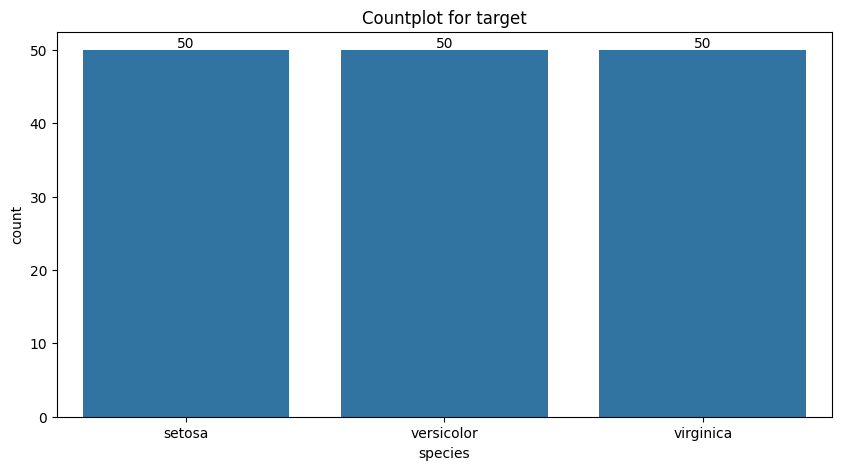

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Countplot for target")

ax = sns.countplot(data=iris, x=target)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

iris[target].value_counts()

In [10]:
iris[[target]].describe()

,species
count,150
unique,3
top,setosa
freq,50


In [11]:
feat_cols = iris.columns.to_list()
feat_cols.remove(target)
feat_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

### Group of statistical variable

In [12]:
continuous = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris[continuous]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Numerical features

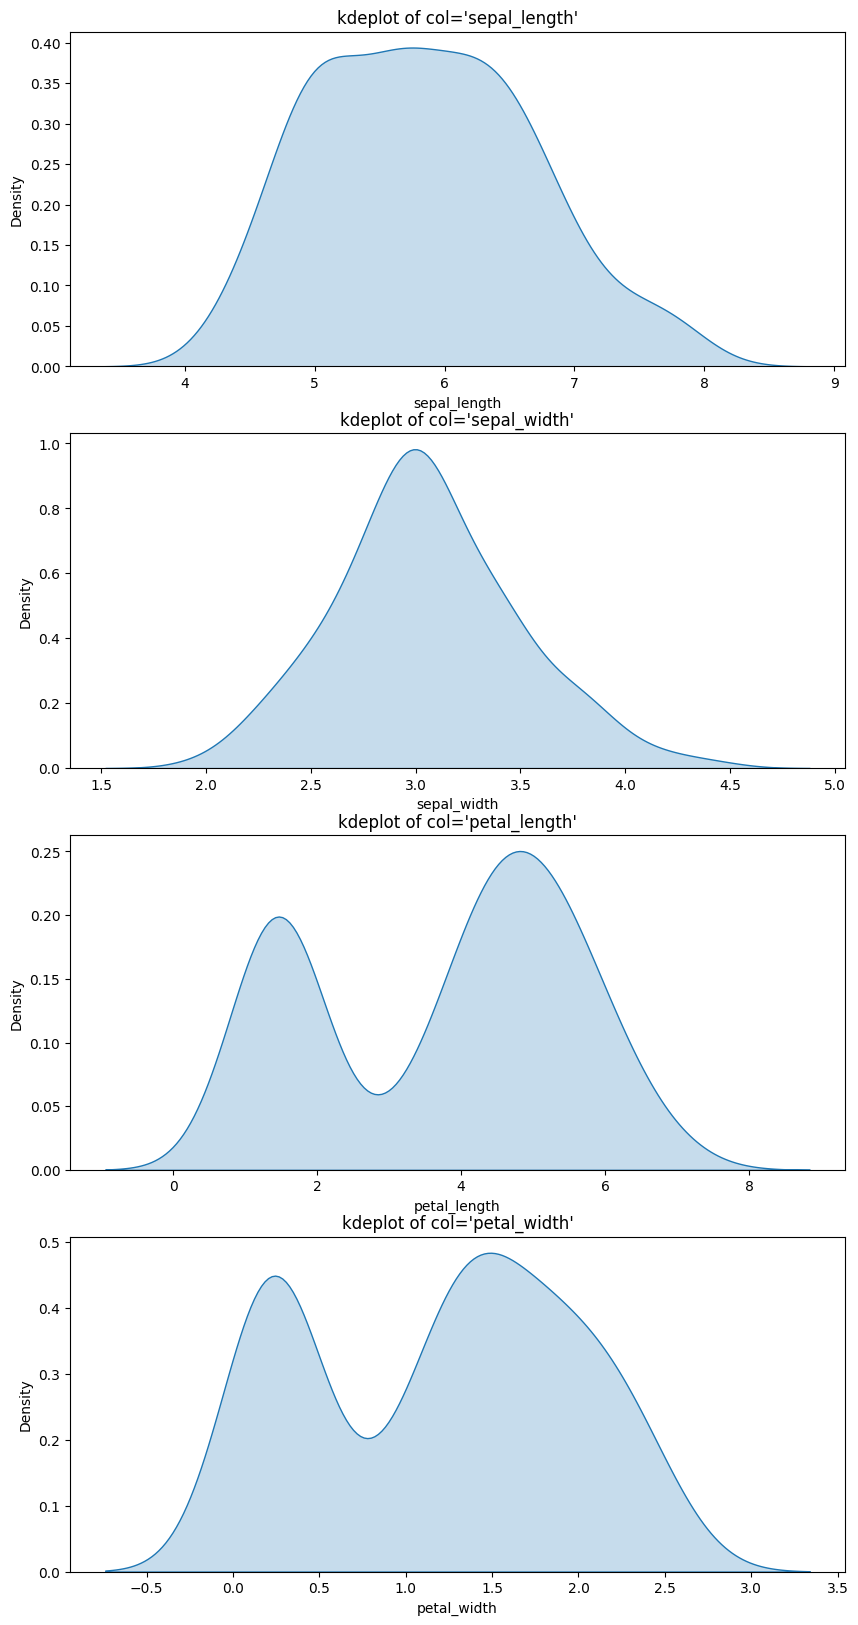

In [13]:
import numpy as np

N_num = len(continuous) #length of numerical features
plt.figure(figsize=(10, 5*N_num))

for i in np.arange(N_num):
    col = continuous[i]

    plt.subplot(N_num, 1, i+1)
    plt.title(f"kdeplot of col='{col}'")

    sns.kdeplot(data=iris, x=col, fill=True)



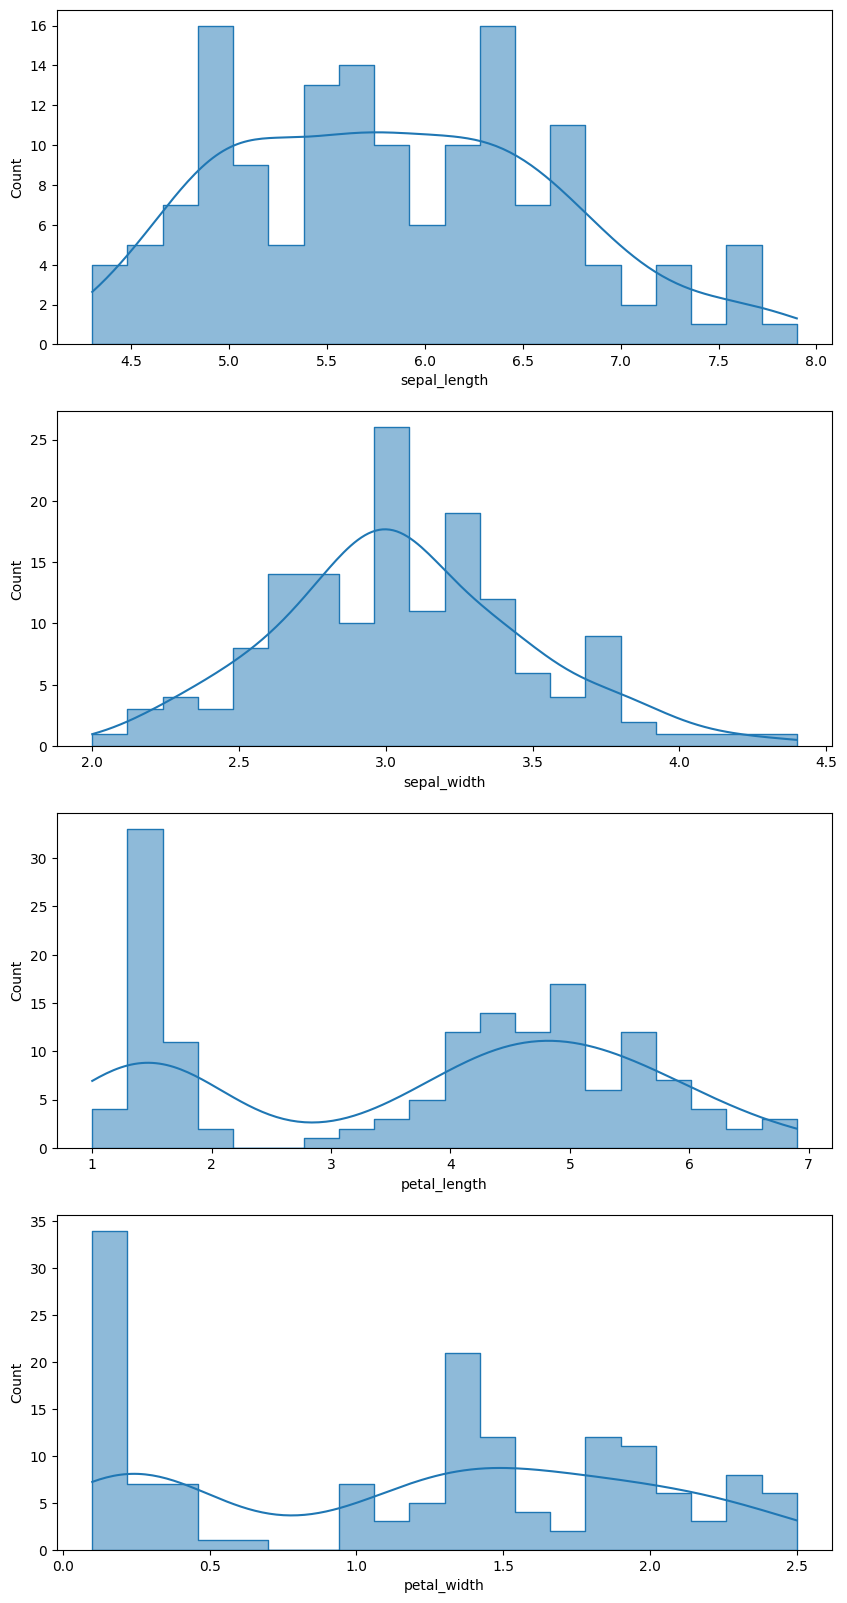

In [14]:
plt.figure(figsize=(10, 5*N_num))

for i in np.arange(N_num):
    col = continuous[i]

    plt.subplot(N_num, 1, i+1)
    sns.histplot(data=iris, x=col, fill=True, element='step', stat='count', discrete=False, kde=True, bins=20)

In [15]:
iris[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


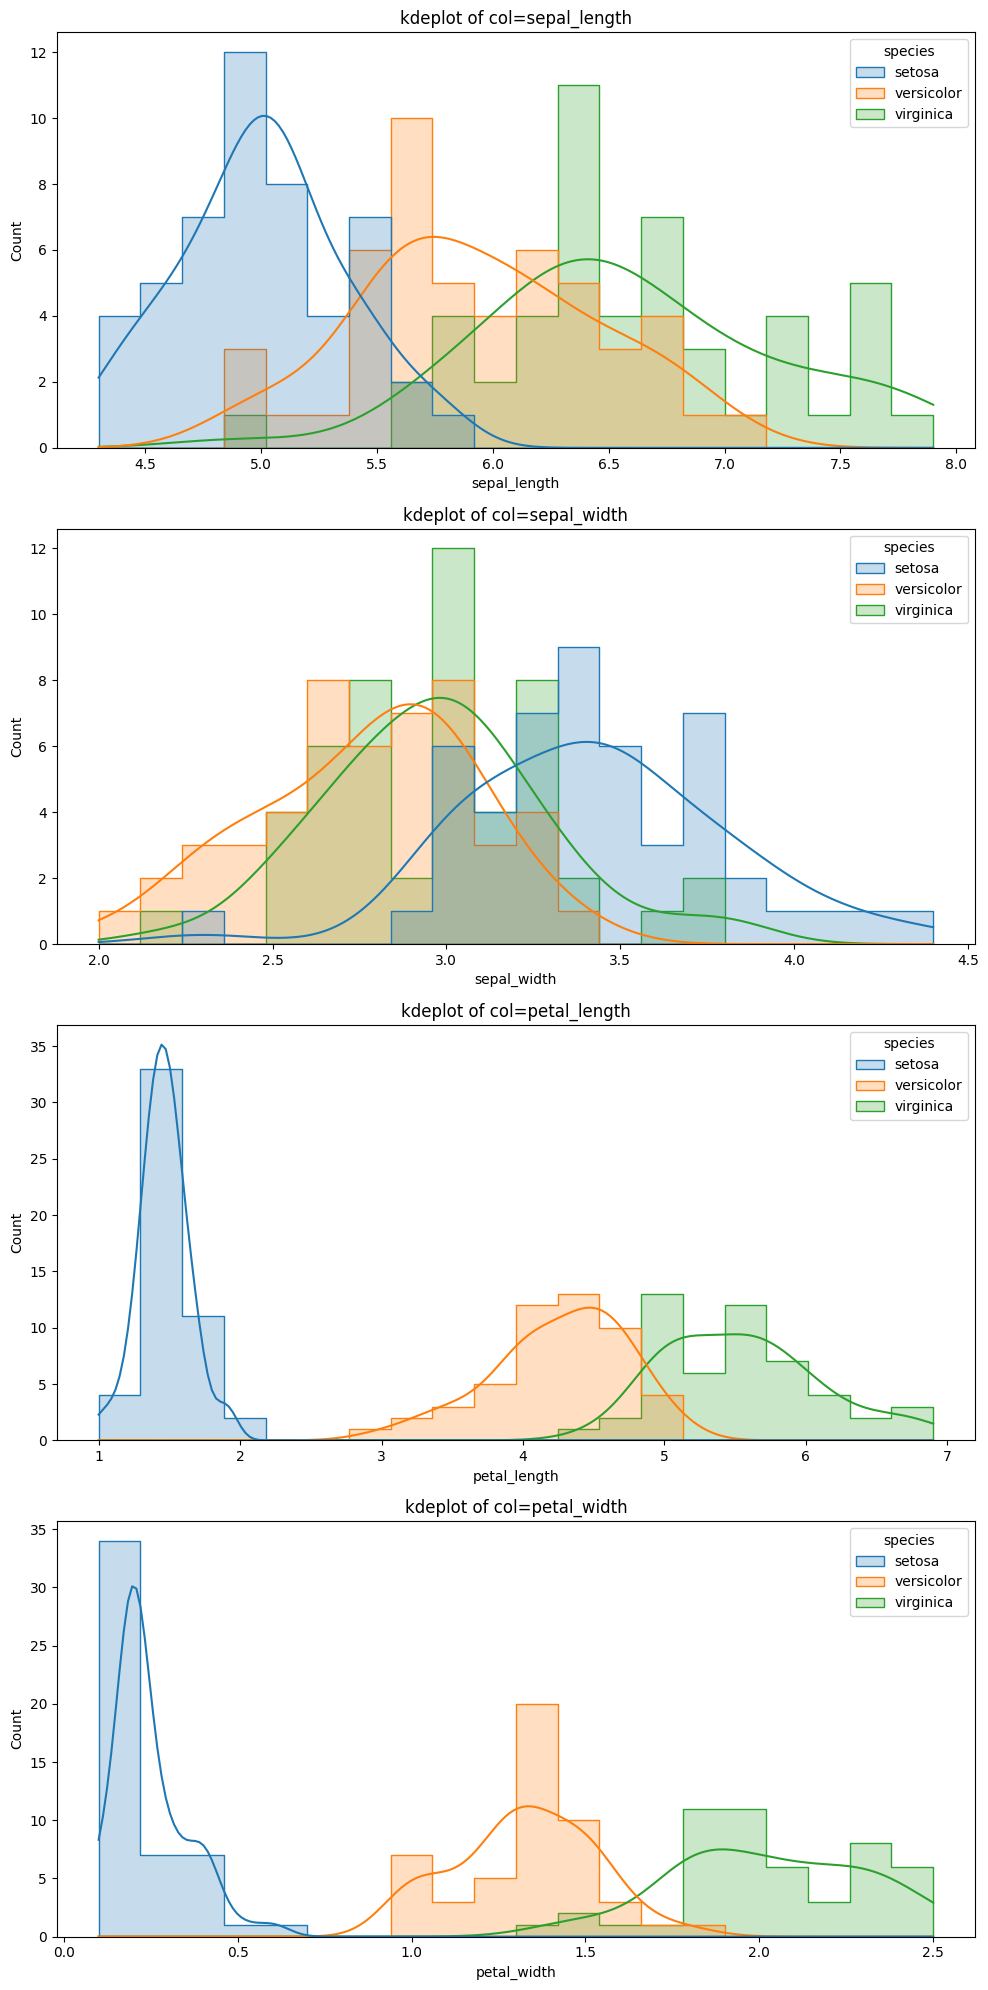

In [16]:
N_cat = len(continuous)

plt.figure(figsize=(10, 5*N_cat))

for i in np.arange(N_cat):
    col = continuous[i]

    plt.subplot(N_cat, 1, i+1)
    plt.title(f"kdeplot of col={col}")

    ax = sns.histplot(data=iris, x=col, hue=target, kde=True, element='step', bins=20)
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()

In [17]:
import pandas as pd

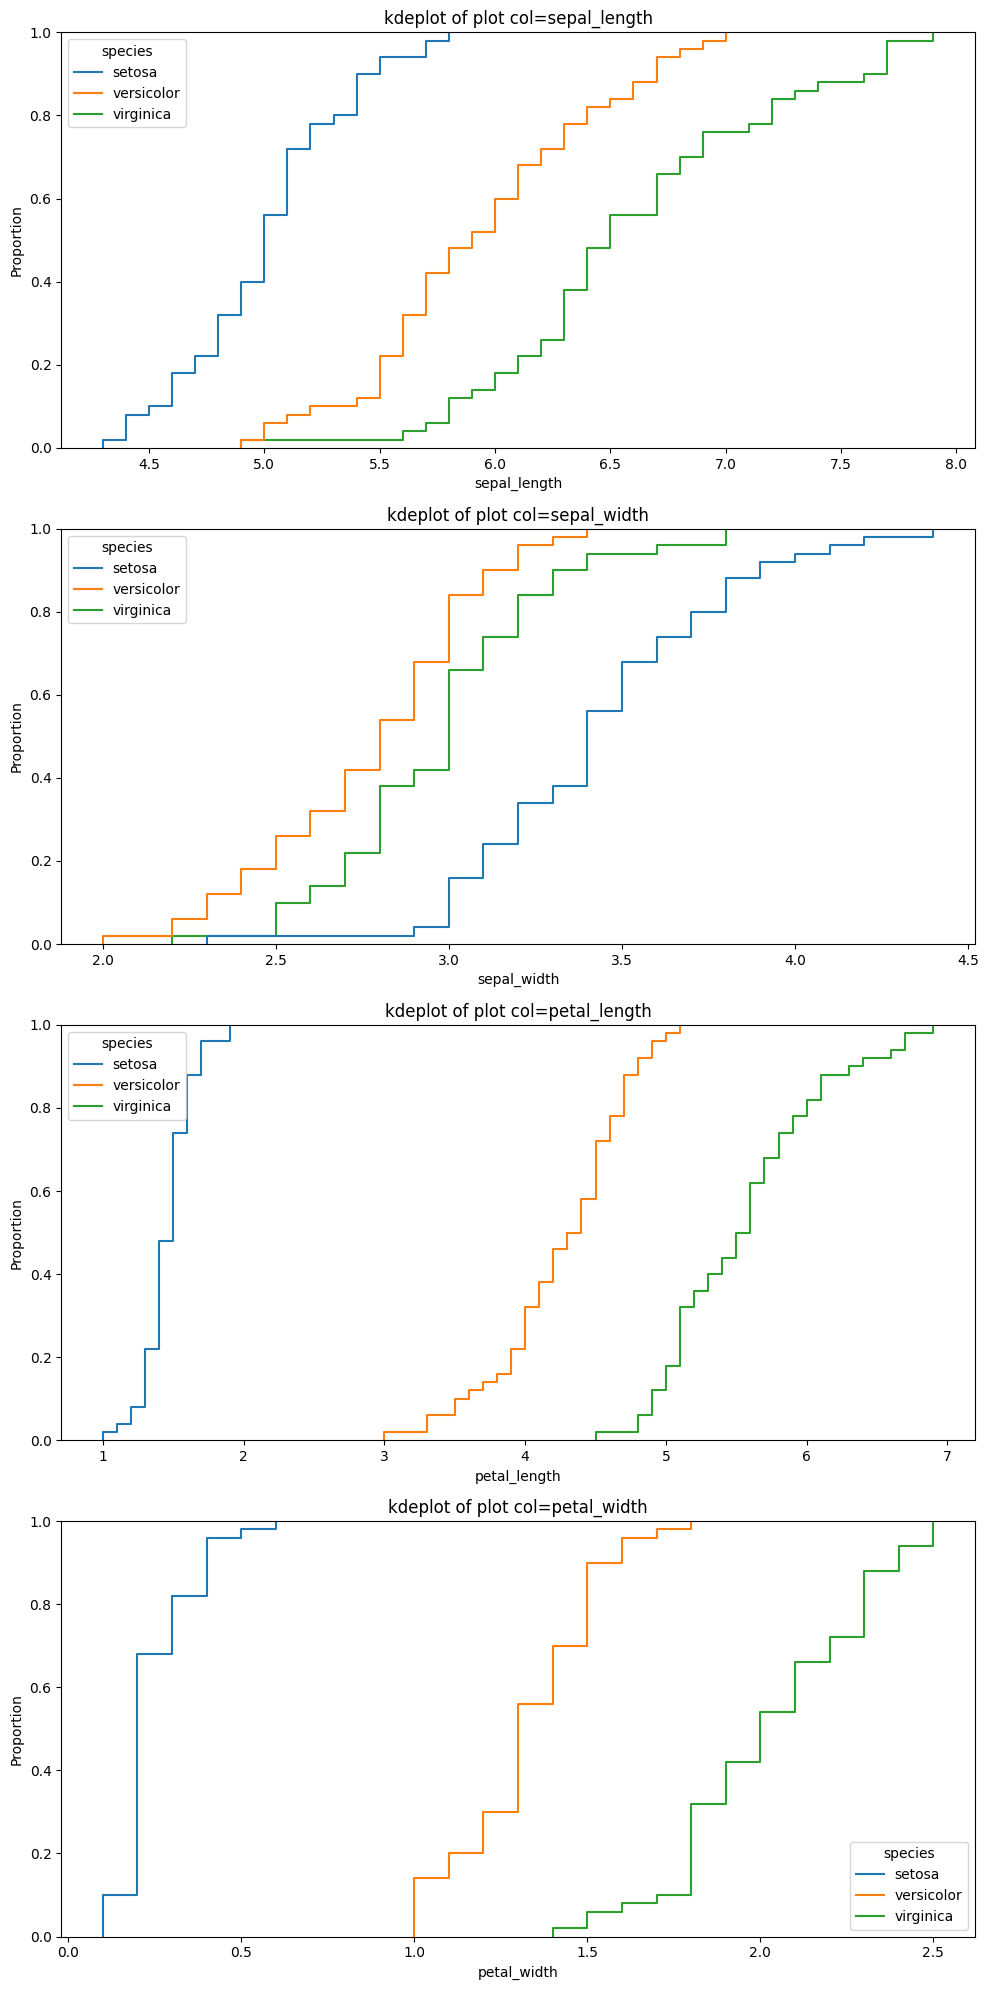

In [26]:
plt.figure(figsize=(10, 5*N_num))

for i in np.arange(N_num):
    col = continuous[i]

    plt.subplot(N_num, 1, i+1)
    plt.title(f"kdeplot of plot col={col}")

    sns.ecdfplot(data=iris, x=col, hue=target)

plt.tight_layout()

In [19]:
for col in continuous:
    display(iris[[col, target]].groupby(target).describe())

sepal_length                                            
                  count   mean       std  min    25%  50%  75%  max
species                                                            
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

sepal_width                                              
                 count   mean       std  min    25%  50%    75%  max
species                                                             
setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

petal_length                                             
                  count   mean       std  min  25%   50%    75%  max
species                                                             
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

petal_width                                          
                 count   mean       std  min  25%  50%  75%  max
species                                                         
setosa            50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6
versicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

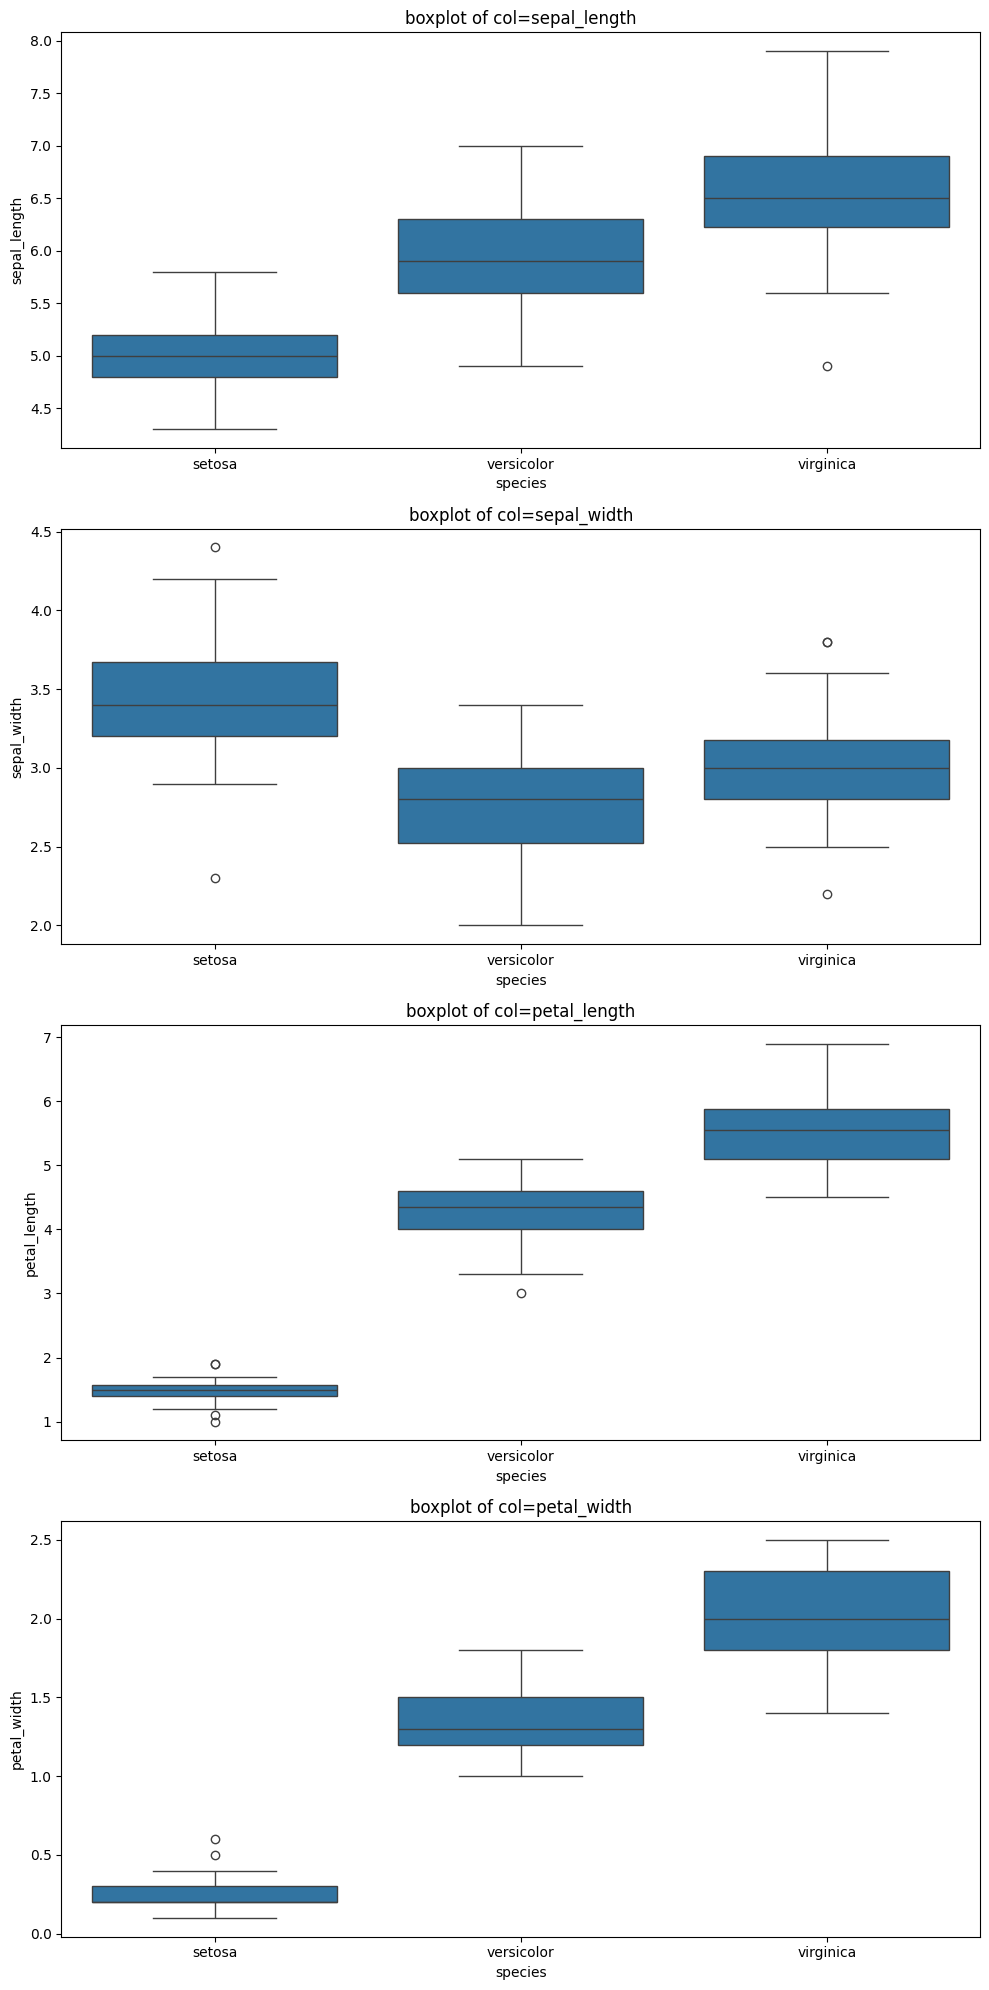

In [20]:
N_num = len(continuous)

plt.figure(figsize=(10, 5*N_num))

for i in np.arange(N_num):
    col = continuous[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'boxplot of col={col}')

    sns.boxplot(data=iris, x=target, y=col)

plt.tight_layout()

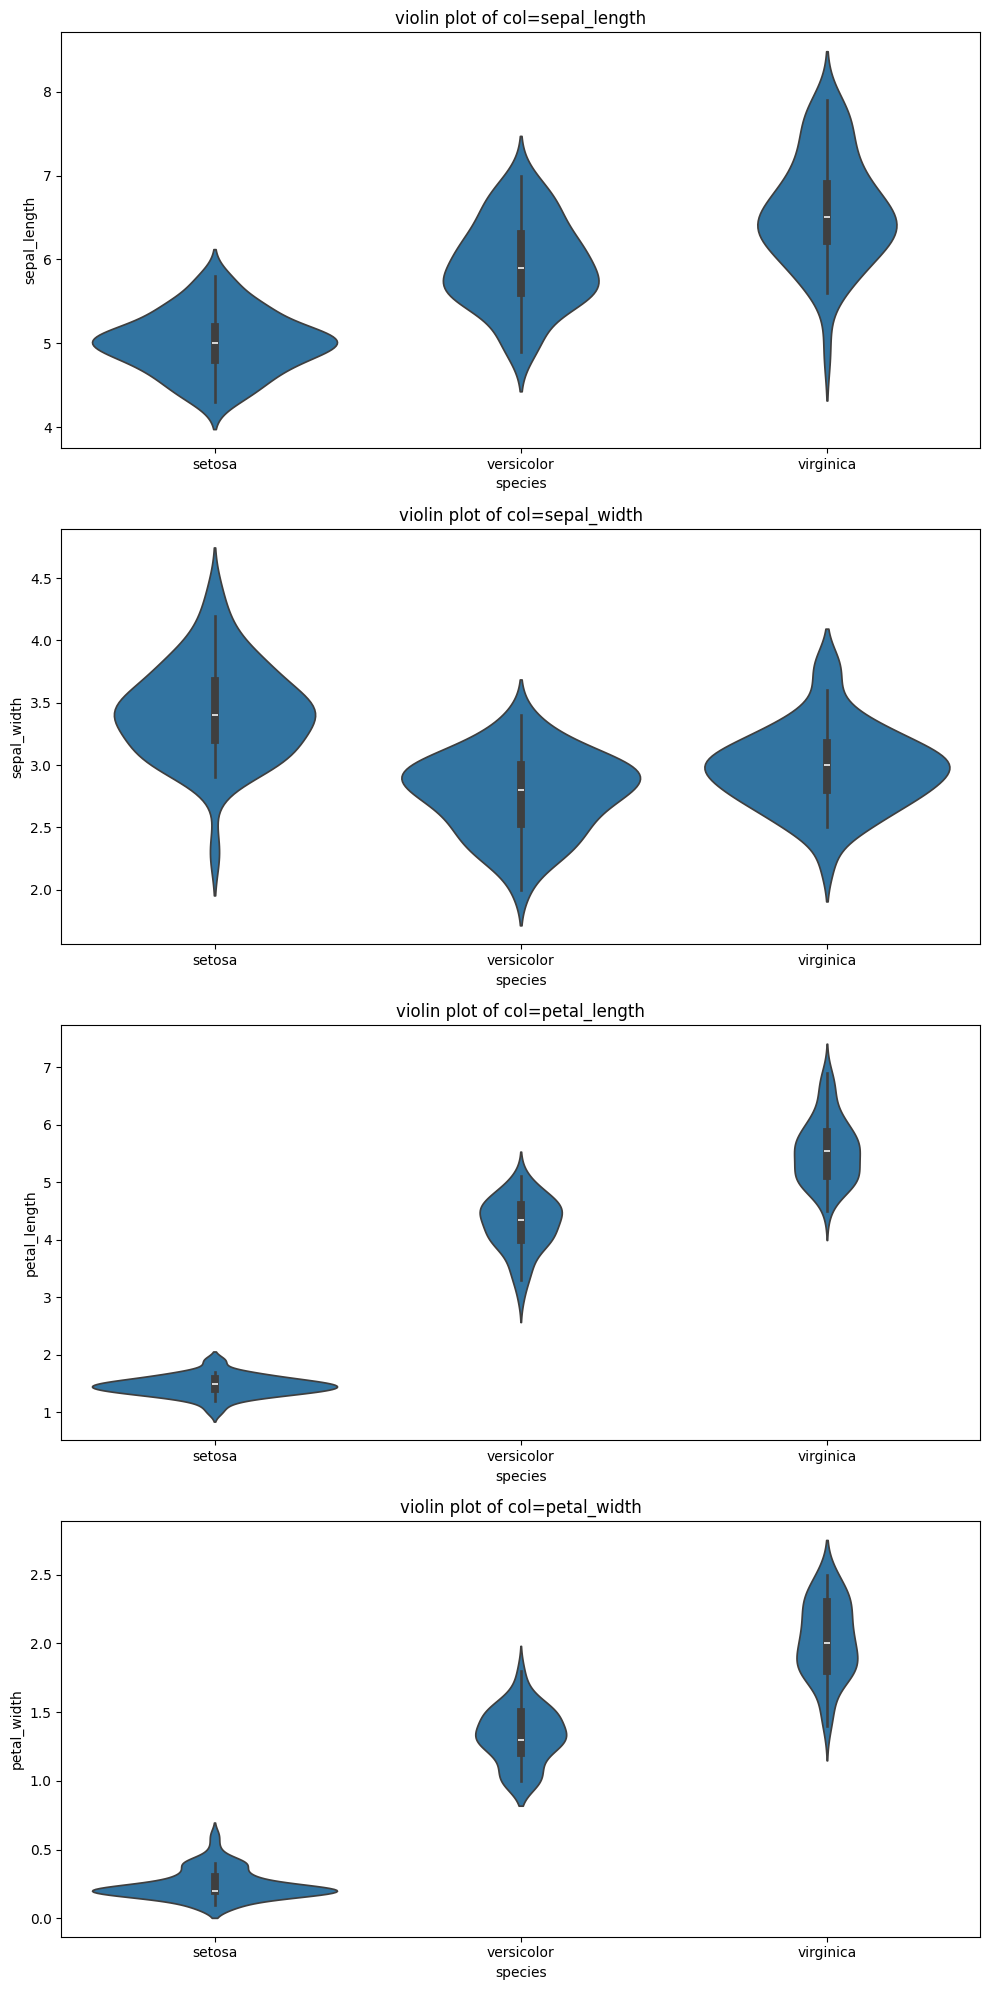

In [21]:
N_num = len(continuous)

plt.figure(figsize=(10, 5*N_num))

for i in np.arange(N_num):
    col = continuous[i]

    plt.subplot(N_num, 1, i+1)
    plt.title(f'violin plot of col={col}')

    sns.violinplot(data=iris, x=target, y=col)

plt.tight_layout()

### Correlations

In [22]:
iris[[target]+continuous].corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


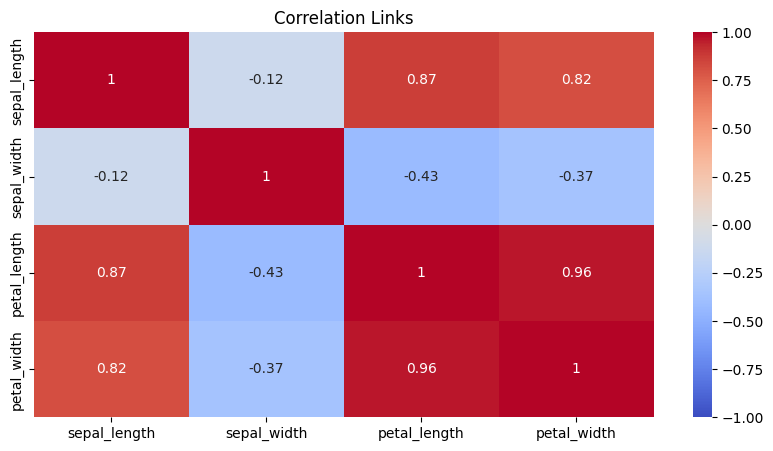

In [23]:
plt.figure(figsize=(10, 5))
plt.title("Correlation Links")

sns.heatmap(data=iris[[target]+continuous].corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

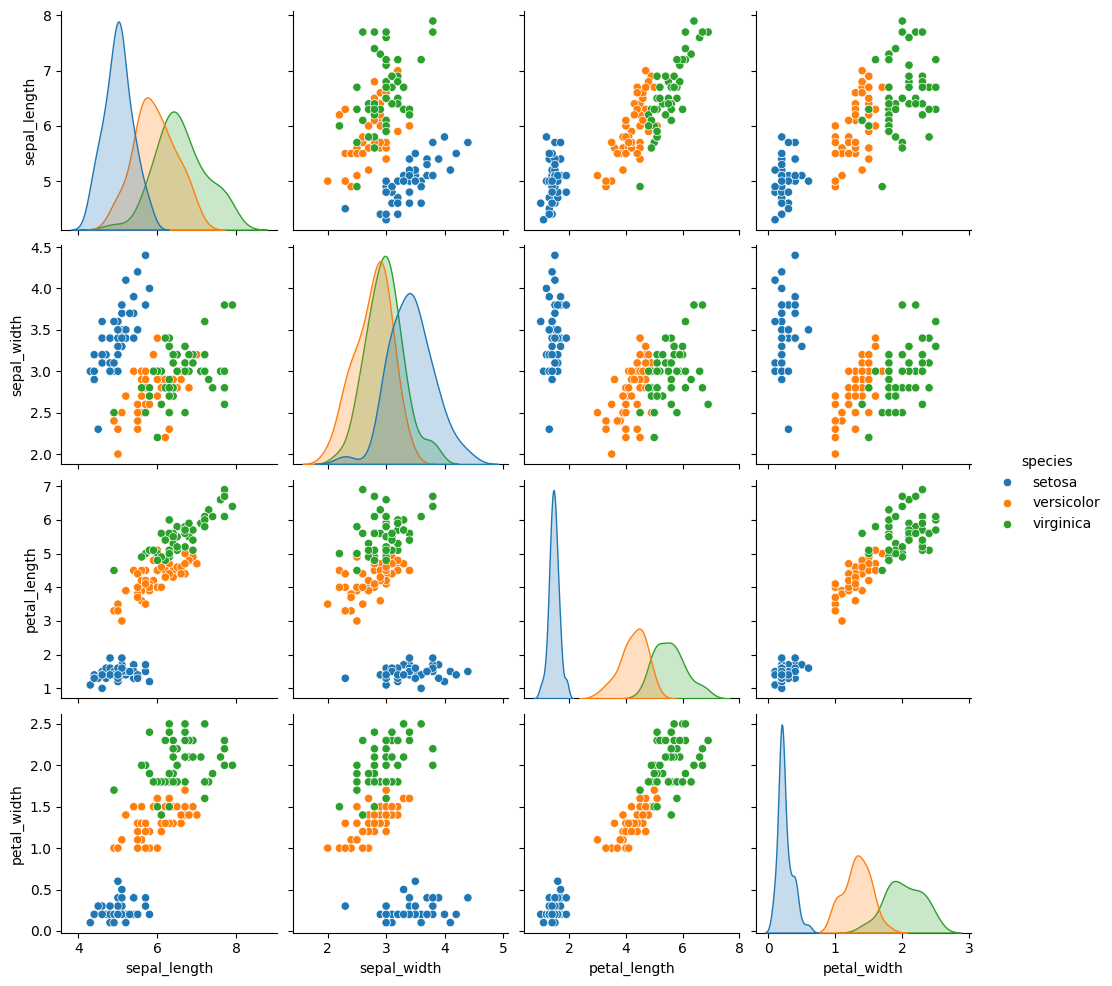

In [24]:
sns.pairplot(data=iris, hue=target)
plt.show()